# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [9]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
print(os.getenv("PUIDATA"))

Populating the interactive namespace from numpy and matplotlib
/nfshome/jz3525/PUIdata


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [10]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [11]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [12]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [13]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [14]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

I am splitting data by trips at day and at night:

**H0: there is no statistical difference between tripdurations at day and at night**
$$ \alpha = 0.05 $$

To simply the question, here I assume that 

daytime: 6am to 6pm

nighttime: 6pm to 6am.

In [41]:
df['date'] = pd.to_datetime(df['starttime'])

In [57]:
#df is the dataframe where the content of the csv file is stored
#df_day = df[['start station id', 'tripduration']][(df['date'].dt.hour >= 6) & (df['date'].dt.hour < 18)]
#df_night = df[['start station id', 'tripduration']][(df['date'].dt.hour >=18) | (df['date'].dt.hour < 6)]
df_day = df[(df['date'].dt.hour >= 6) & (df['date'].dt.hour < 18)]
df_night = df[(df['date'].dt.hour >=18) | (df['date'].dt.hour < 6)]

In [84]:
#dropping some data I no longer need
#... your code here...
df_day = df_day[['tripduration', 'start station id']]
df_night = df_night[['tripduration', 'start station id']]

In [85]:
df_day.describe()
#df_night.head(20)

,tripduration,start station id
count,137635.000000,137635.000000
mean,641.448302,440.687667
std,789.385031,322.109972
min,60.000000,72.000000
25%,341.000000,311.000000
50%,506.000000,421.000000
75%,758.500000,491.000000
max,40640.000000,3002.000000


In [86]:
df_night.describe()

,tripduration,start station id
count,57028.000000,57028.000000
mean,635.622992,431.202883
std,970.289702,311.825049
min,60.000000,72.000000
25%,334.000000,302.000000
50%,499.000000,406.000000
75%,754.000000,489.000000
max,43016.000000,3002.000000


In [87]:
# dropping NaN values
df_day.dropna(inplace = True)
df_night.dropna(inplace = True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

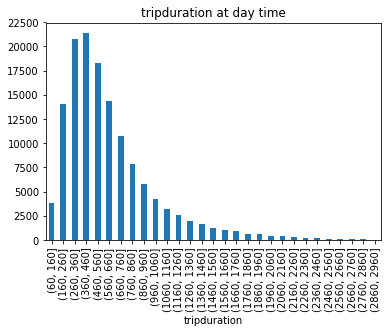

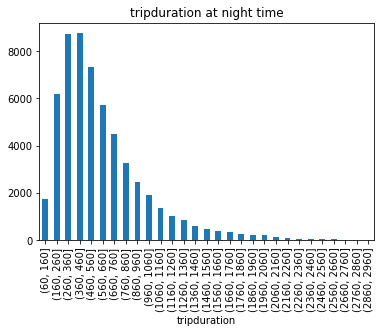

In [88]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60,3000,100)
axD = df_day.tripduration.groupby(pd.cut(df_day.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("tripduration at day time")
axN = df_night.tripduration.groupby(pd.cut(df_night.tripduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("tripduration at night time");


**Figure 1: histogrammed distribution of riders' tripduration by datetime **

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
tripduration               
(60, 160]          0.002461
(160, 260]         0.008917
(260, 360]         0.011031
(360, 460]         0.009308
(460, 560]         0.005154
(560, 660]         0.001144
(660, 760]         0.002022
(760, 860]         0.001983
(860, 960]         0.003212
(960, 1060]        0.005477
(1060, 1160]       0.005959
(1160, 1260]       0.005367
(1260, 1360]       0.006019
(1360, 1460]       0.004381
(1460, 1560]       0.003594
(1560, 1660]       0.002800
(1660, 1760]       0.002032
(1760, 1860]       0.002040
(1860, 1960]       0.001529
(1960, 2060]       0.001832
(2060, 2160]       0.001735
(2160, 2260]       0.001533
(2260, 2360]       0.001000
(2360, 2460]       0.000530
(2460, 2560]       0.000376
(2560, 2660]       0.000513
(2660, 2760]       0.000288
(2760, 2860]       0.000118
(2860, 2960]       0.000000


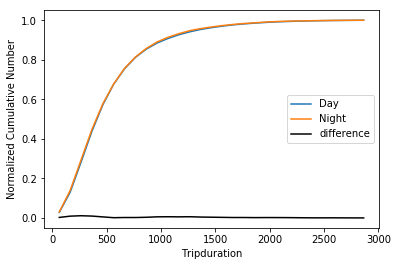

In [89]:
#print df.ageS, df.ageS.cumsum()

csD=df_day.tripduration.groupby(pd.cut(df_day.tripduration, bins)).agg([count_nonzero]).cumsum()

csN=df_night.tripduration.groupby(pd.cut(df_night.tripduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Tripduration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' trip duration by datetime** 

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [90]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [91]:
ks = scipy.stats.ks_2samp(df_day.tripduration, df_night.tripduration)
print (ks)

Ks_2sampResult(statistic=0.012201386267852971, pvalue=1.2045503405878141e-05)


**  FILL IN THE CELL BELOW!**

#### Null hypothesis: the tripduration of trips on day time is the same with the tripduration of trips on night time, under significance level 0.05.
According to the KS test, we found that the 

KS test statistics = 0.0122

p-value = 1.20e-05 < 0.05

Thus we reject the null hypothesis under significance level 0.05 and conclude that the tripduration of trips on day time is not the same with the tripduration of trips on night time.

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

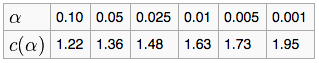

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

# Redo KS tests with the reduced dataset (200 times smaller)

In [79]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df_dayks = df_day.sample(frac = .05, random_state = 200)
df_nightks = df_night.sample(frac = .05, random_state = 200)
ks2 = scipy.stats.ks_2samp(df_dayks.tripduration, df_nightks.tripduration)
print (ks2)

Ks_2sampResult(statistic=0.02512076349213288, pvalue=0.1548233962670276)


#### Null hypothesis: the tripduration of trips on day time is the same with the tripduration of trips on night time, under significance level 0.05.
According to the KS test, we found that the 

KS test statistics = 0.025

p-value = 0.1548 > 0.05

Thus we fail to reject the null hypothesis under significance level 0.05 and conclude that the tripduration of trips on day time is the same with the tripduration of trips on night time.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [125]:
df_dayPr = np.random.choice(df_day.tripduration, 10000)
df_nightPr = np.random.choice(df_night.tripduration, 10000)
df_dayPr.sort()
df_nightPr.sort()

In [124]:
pearson = scipy.stats.pearsonr(df_dayPr, df_nightPr)
print(pearson)

(0.96195143411092188, 0.0)


#### Null hypothesis: the tripduration of trips on day time is not correlated with the tripduration of trips on night time, under significance level 0.05.
According to the Pearson's test, we found that the 

Pearson test statistics = 0.962

p-value = 0 < 0.05

Thus we reject the null hypothesis under significance level 0.05 and conclude that the tripduration of trips on day time is correlated with the tripduration of trips on night time, under significance level 0.05.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [126]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
spearman = scipy.stats.spearmanr(df_dayPr, df_nightPr)
print(spearman)

SpearmanrResult(correlation=0.99999833722926412, pvalue=0.0)


#### Null hypothesis: the tripduration of trips on day time is not correlated with the tripduration of trips on night time, under significance level 0.05.
According to the Spearman's test, we found that the 

Spearman test statistics = 0.999

p-value = 0 < 0.05

Thus we reject the null hypothesis under significance level 0.05 and conclude that the tripduration of trips on day time is correlated with the tripduration of trips on night time, under significance level 0.05.

# Extra Credit
## age of bikers for trips originating in Manhattan and in Brooklyn